***Importing All Libraries***

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings("ignore")

***Importing Datatset***

In [ ]:
data = pd.read_csv("/content/datasets_13720_18513_insurance(1).csv")

***Print First 5 Rows Of Dataset***

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Shape of the Dataset

In [ ]:
data.shape

(1338, 7)

Information of the Dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


***Describing the Whole Dataset***

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


***Names of Column***

In [ ]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

***Finding the Missing Value***

In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

***Exploratory Data Analysis***

Checking Pertticular Columns

Checking Age Column

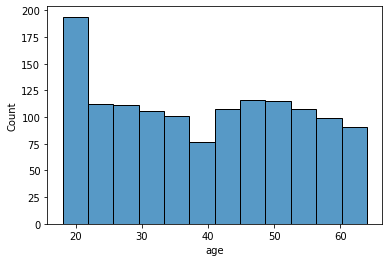

In [ ]:
sns.histplot(data.age)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


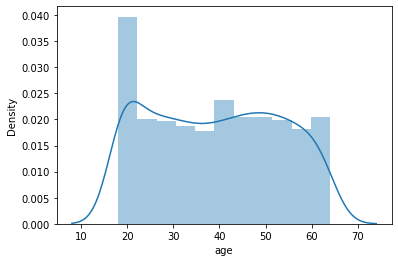

In [ ]:
sns.distplot(data.age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


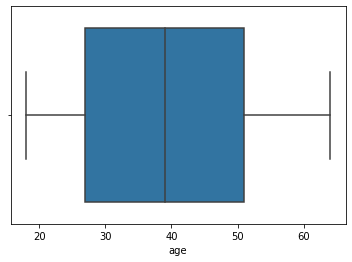

In [ ]:
sns.boxplot(data.age)

In [ ]:
data.age

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [ ]:
data.age.unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [ ]:
data.age.value_counts()

18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64

Checking Sex Column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


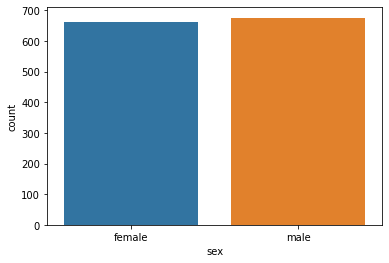

In [ ]:
sns.countplot(data.sex)

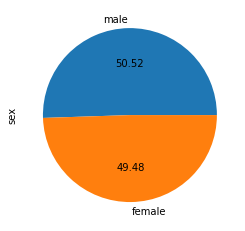

In [ ]:
data['sex'].value_counts().plot(kind="pie", autopct="%.2f")

In [ ]:
data.sex

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [ ]:
data.sex.unique()

array(['female', 'male'], dtype=object)

In [ ]:
data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

Checking Bmi Column

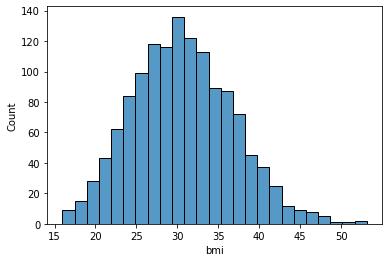

In [ ]:
sns.histplot(data.bmi)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


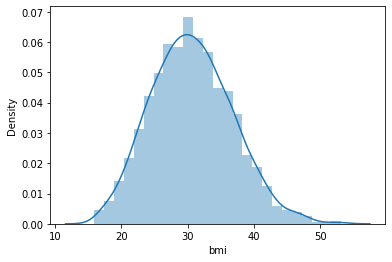

In [ ]:
sns.distplot(data.bmi)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


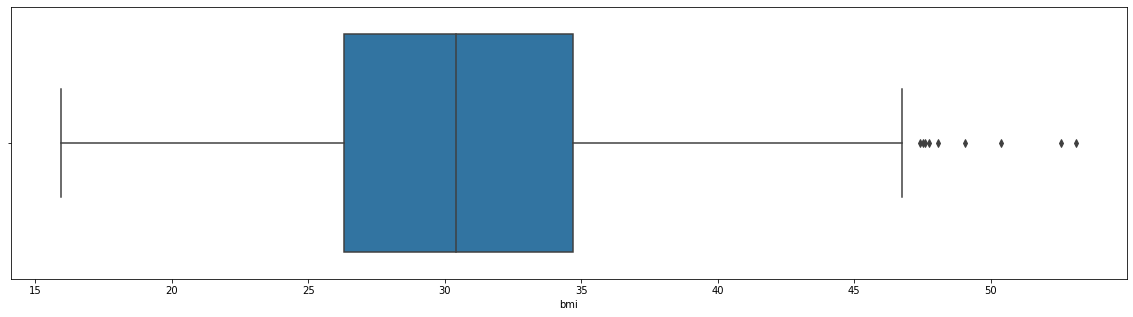

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(data.bmi)

In [ ]:
data.bmi

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

Checking Children Column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


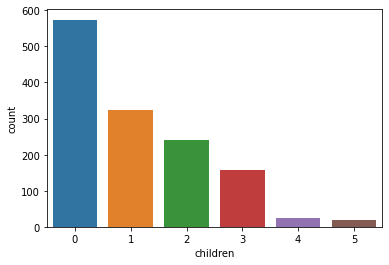

In [ ]:
sns.countplot(data.children)

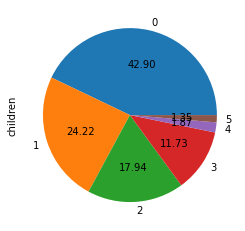

In [ ]:
data.children.value_counts().plot(kind="pie", autopct="%.2f")

In [ ]:
data.children

0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64

In [ ]:
data.children.unique()

array([0, 1, 3, 2, 5, 4])

In [ ]:
data.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Checking the Smoker Column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


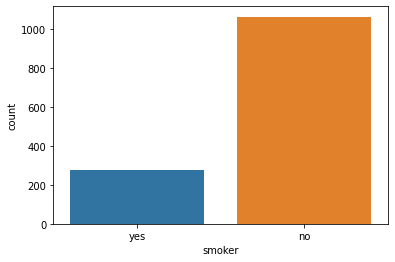

In [ ]:
sns.countplot(data.smoker)

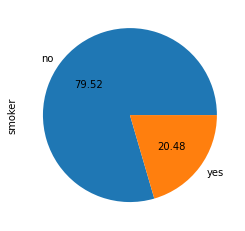

In [ ]:
data['smoker'].value_counts().plot(kind="pie", autopct="%.2f")

In [ ]:
data.smoker

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [ ]:
data.smoker.unique()

array(['yes', 'no'], dtype=object)

In [ ]:
data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

**Checking the Region Column**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


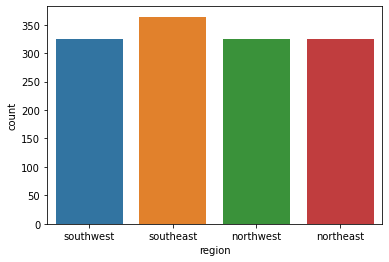

In [ ]:
sns.countplot(data.region)

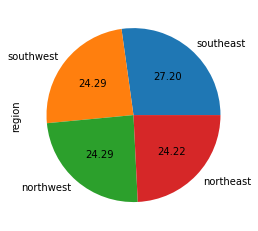

In [ ]:
data['region'].value_counts().plot(kind="pie", autopct="%.2f")

In [ ]:
data.region

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [ ]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

# ***Checking The Outliers***

In [ ]:
data[data.bmi>48.5]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


In [ ]:
#data.drop([116,847,1047,1317], axis = 0, inplace = True)

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# ***Checking Two Columns With EachOther***

***Age Vs Bmi***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


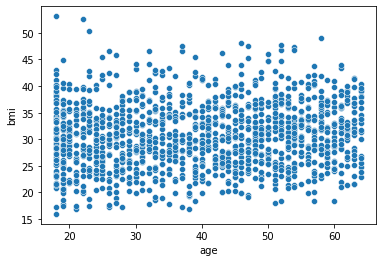

In [ ]:
sns.scatterplot(data["age"], data["bmi"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


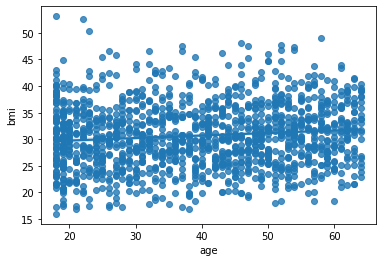

In [ ]:
sns.regplot(data["age"], data["bmi"])

***Age Vs Charges***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


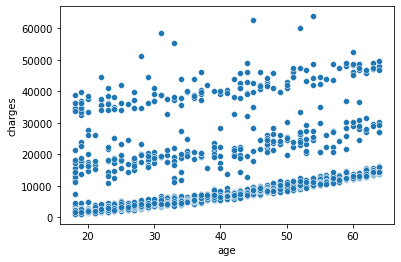

In [ ]:
sns.scatterplot(data.age,data.charges)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


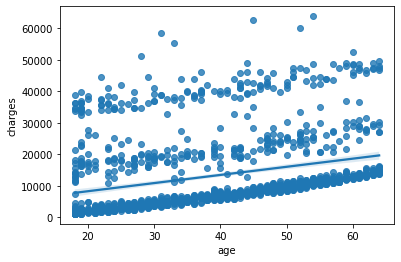

In [ ]:
sns.regplot(data["age"], data["charges"])

***Bmi Vs Charges***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


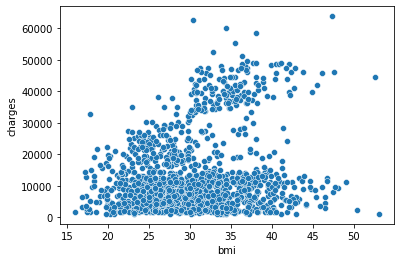

In [ ]:
sns.scatterplot(data.bmi,data.charges)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


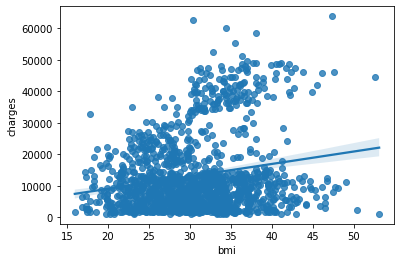

In [ ]:
sns.regplot(data["bmi"], data["charges"])

# ***Checking Three Columns with EachOther***

***Age Vs Bmi on Sex***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


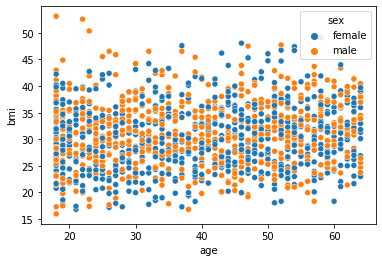

In [ ]:
sns.scatterplot(data["age"], data["bmi"], hue=data["sex"])

***Age Vs Charges on Sex***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


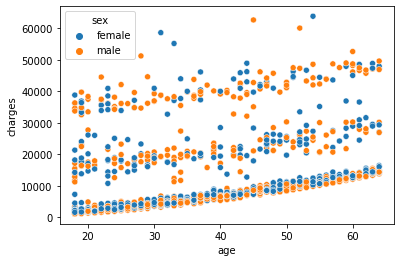

In [ ]:
sns.scatterplot(data["age"], data["charges"], hue=data["sex"])

***Bmi Vs Charges on Sex***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


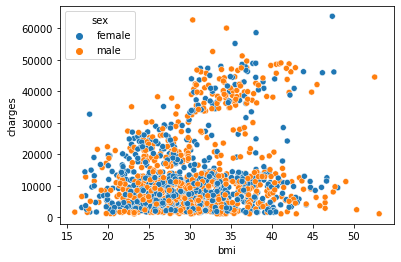

In [ ]:
sns.scatterplot(data["bmi"], data["charges"], hue=data["sex"])

***Age Vs Bmi On Children***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


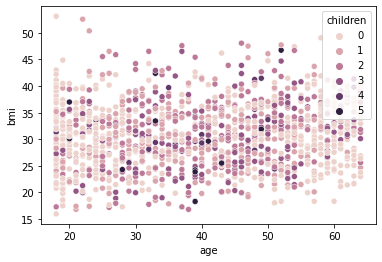

In [ ]:
sns.scatterplot(data["age"], data["bmi"], hue=data["children"])

***Age Vs Charges on Children***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


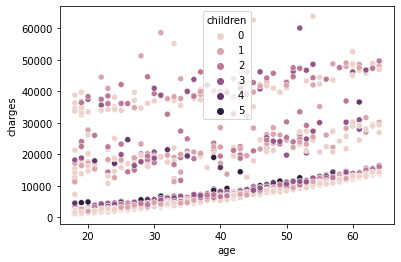

In [ ]:
sns.scatterplot(data["age"], data["charges"], hue=data["children"])

***Bmi Vs Charges On Children***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


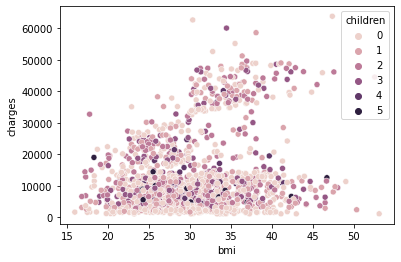

In [ ]:
sns.scatterplot(data["bmi"], data["charges"], hue=data["children"])

***Age Vs Bmi on Smoker***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


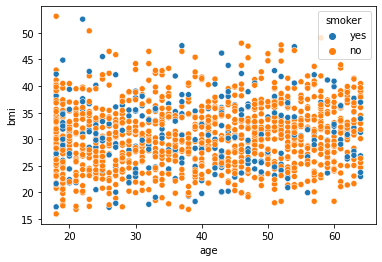

In [ ]:
sns.scatterplot(data["age"], data["bmi"], hue=data["smoker"])

***Age Vs Charges On Smoker***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


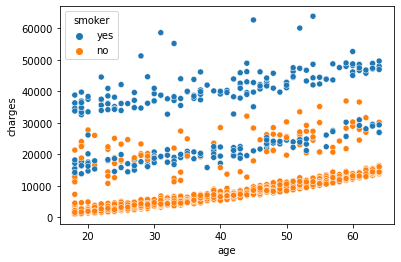

In [ ]:
sns.scatterplot(data["age"], data["charges"], hue=data["smoker"])

***Bmi Vs Charges on Smoker***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


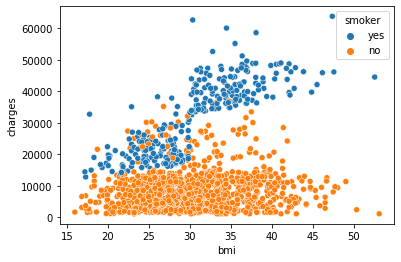

In [ ]:
sns.scatterplot(data["bmi"], data["charges"], hue=data["smoker"])

***Age Vs Bmi on Region***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


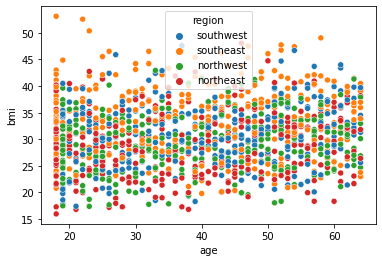

In [ ]:
sns.scatterplot(data["age"], data["bmi"], hue=data["region"])

***Age Vs Charges On Region***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


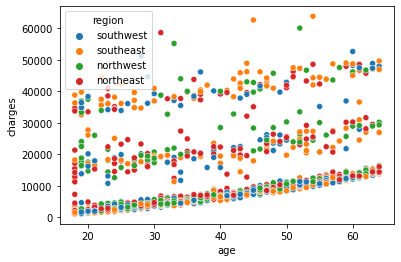

In [ ]:
sns.scatterplot(data["age"], data["charges"], hue=data["region"])

***Bmi Vs Charges On Region***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


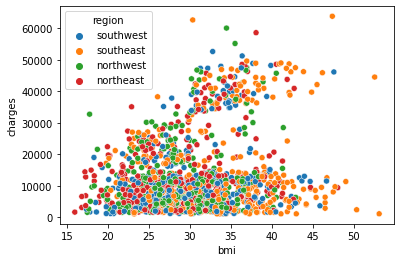

In [ ]:
sns.scatterplot(data["bmi"], data["charges"], hue=data["region"])

# ***Checking Four Columns With EachOther***

***Age Vs Bmi On Sex With Smoker***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


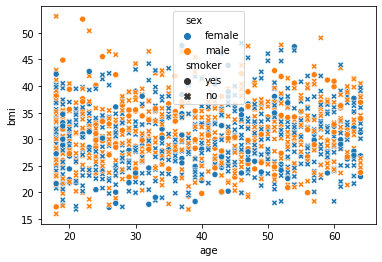

In [ ]:
sns.scatterplot(data["age"], data["bmi"], hue=data["sex"], style=data['smoker'])

***Age Vs Bmi On Sex With Region***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


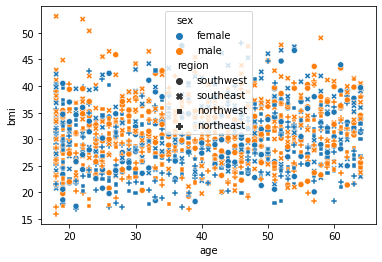

In [ ]:
sns.scatterplot(data["age"], data["bmi"], hue=data["sex"], style=data['region'])

***Age Vs Bmi on Sex With Children***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


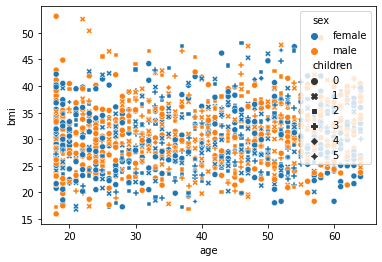

In [ ]:
sns.scatterplot(data["age"], data["bmi"], hue=data["sex"], style=data['children'])

***Age Vs Bmi on Children With Region***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


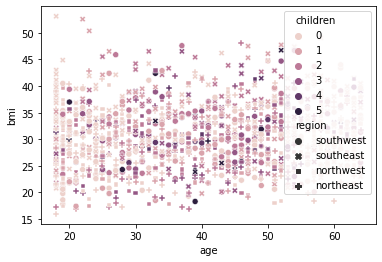

In [ ]:
sns.scatterplot(data["age"], data["bmi"], hue=data["children"], style=data['region'])

***Age Vs Charges On Children With Smoker***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


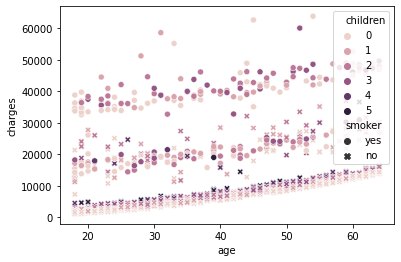

In [ ]:
sns.scatterplot(data["age"], data["charges"], hue=data["children"], style=data['smoker'])

***Age Vs Charges on Children With Region***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


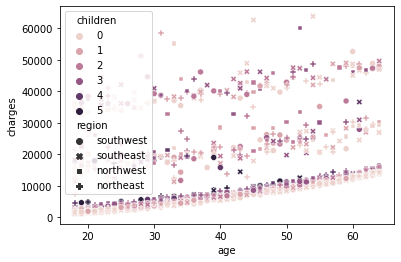

In [ ]:
sns.scatterplot(data["age"], data["charges"], hue=data["children"], style=data['region'])

***Bmi Vs Charges On Children With Region***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


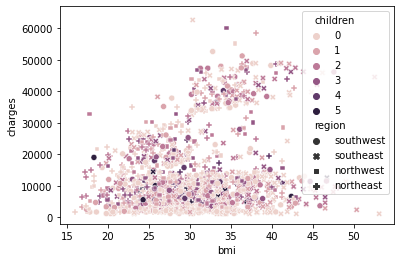

In [ ]:
sns.scatterplot(data["bmi"], data["charges"], hue=data["children"], style=data['region'])

***Bmi Vs Charges On Children With Smoker***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


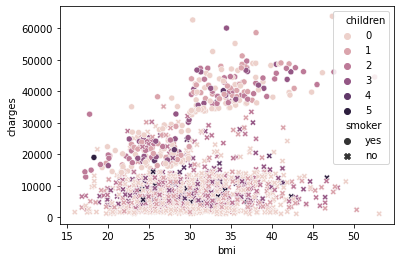

In [ ]:
sns.scatterplot(data["bmi"], data["charges"], hue=data["children"], style=data['smoker'])

***Bmi Vs Charges On Children With Region***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


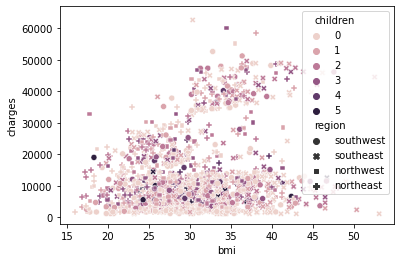

In [ ]:
sns.scatterplot(data["bmi"], data["charges"], hue=data["children"], style=data['region'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


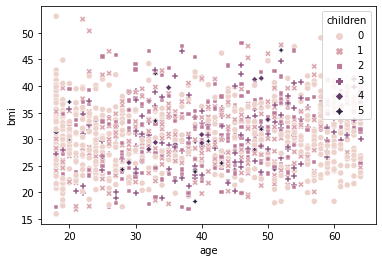

In [ ]:
sns.scatterplot(data["age"], data["bmi"], hue=data["children"], style=data['children'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


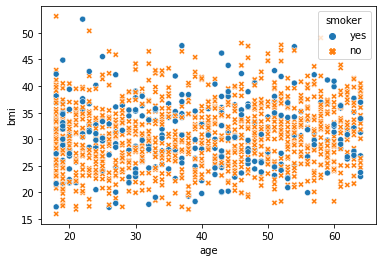

In [ ]:
sns.scatterplot(data["age"], data["bmi"], hue=data["smoker"], style=data['smoker'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


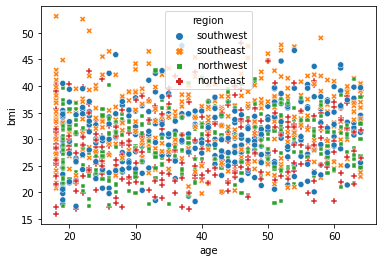

In [ ]:
sns.scatterplot(data["age"], data["bmi"], hue=data["region"], style=data['region'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


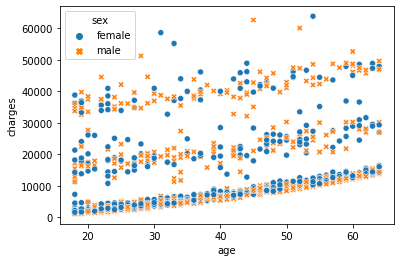

In [ ]:
sns.scatterplot(data["age"], data["charges"], hue=data["sex"], style=data['sex'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


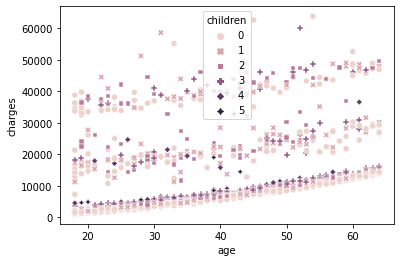

In [ ]:
sns.scatterplot(data["age"], data["charges"], hue=data["children"], style=data['children'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


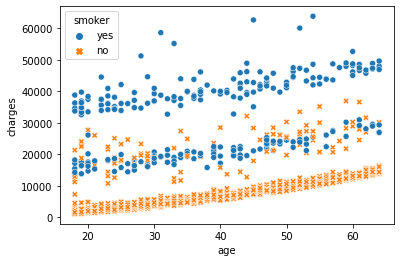

In [ ]:
sns.scatterplot(data["age"], data["charges"], hue=data["smoker"], style=data['smoker'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


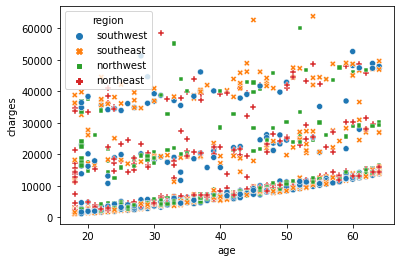

In [ ]:
sns.scatterplot(data["age"], data["charges"], hue=data["region"], style=data['region'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


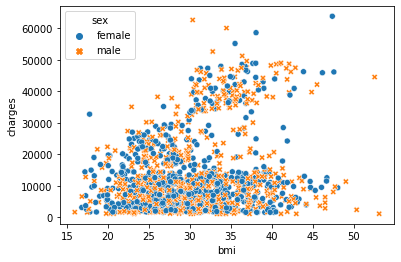

In [ ]:
sns.scatterplot(data["bmi"], data["charges"], hue=data["sex"], style=data['sex'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


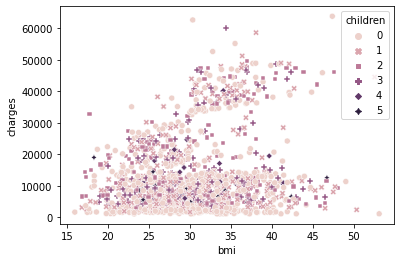

In [ ]:
sns.scatterplot(data["bmi"], data["charges"], hue=data["children"], style=data['children'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


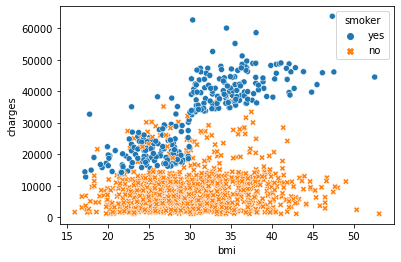

In [ ]:
sns.scatterplot(data["bmi"], data["charges"], hue=data["smoker"], style=data['smoker'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


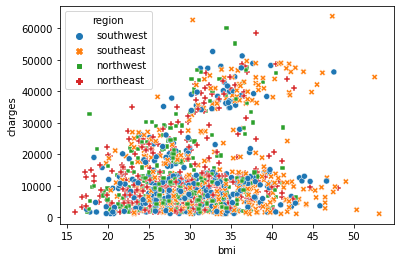

In [ ]:
sns.scatterplot(data["bmi"], data["charges"], hue=data["region"], style=data['region'])

***Regression Line On Age Vs Bmi***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


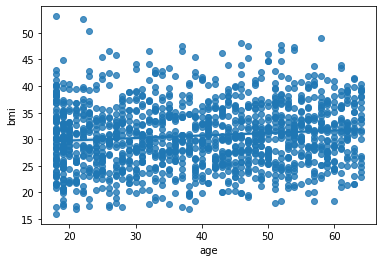

In [ ]:
sns.regplot(data.age,data.bmi)

***Regression Line ON Age Vs Charges***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


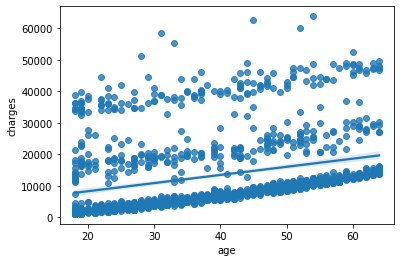

In [ ]:
sns.regplot(data.age,data.charges)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


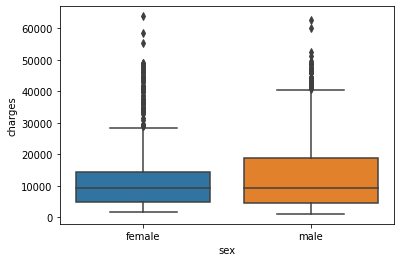

In [ ]:
sns.boxplot(data.sex,data.charges)

***Regression Line on Bmi Vs Charges***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


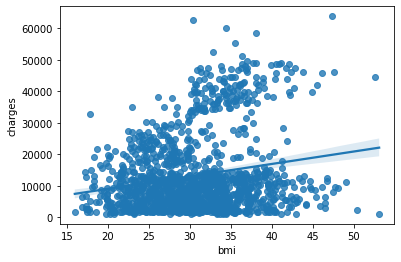

In [ ]:
sns.regplot(data.bmi,data.charges)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


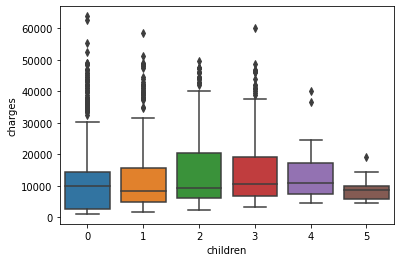

In [ ]:
sns.boxplot(data.children,data.charges)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


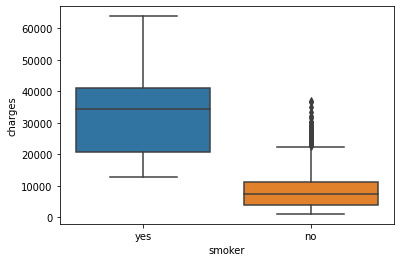

In [ ]:
sns.boxplot(data.smoker,data.charges)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


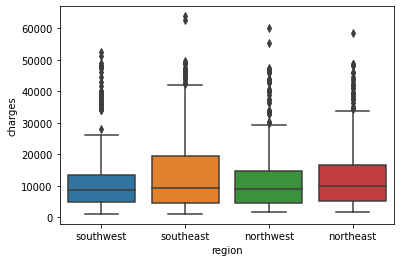

In [ ]:
sns.boxplot(data.region,data.charges)

# ***Feature Engineering***

***Label Encoding for Sex Column***

In [ ]:
le1 = LabelEncoder()
data["sex"] = le1.fit_transform(data.sex)

***Label Encoding for Smoker Column***

In [ ]:
le2 = LabelEncoder()
data["smoker"] = le2.fit_transform(data.smoker)

***One Hot Encoding on Region***

In [ ]:
ohe = OneHotEncoder()
X = ohe.fit_transform(data.region.values.reshape(-1,1)).toarray()
OHE = pd.DataFrame(X, columns = ["northeast","northwest","southeast","southwest"])
df = pd.concat([data, OHE], axis=1)
df = df.drop("region",axis = 1)

In [ ]:
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,1629.83350,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,2007.94500,0.0,0.0,0.0,1.0


In [ ]:
df.shape

(1338, 10)

In [ ]:
from scipy import stats
df[(np.abs(stats.zscore(df.bmi)) > 3)]

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
116,58,1,49.06,0,0,11381.3254,0.0,0.0,1.0,0.0
847,23,1,50.38,1,0,2438.0552,0.0,0.0,1.0,0.0
1047,22,1,52.58,1,1,44501.3982,0.0,0.0,1.0,0.0
1317,18,1,53.13,0,0,1163.4627,0.0,0.0,1.0,0.0


In [ ]:
df[df.bmi>48.5]

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
116,58,1,49.06,0,0,11381.3254,0.0,0.0,1.0,0.0
847,23,1,50.38,1,0,2438.0552,0.0,0.0,1.0,0.0
1047,22,1,52.58,1,1,44501.3982,0.0,0.0,1.0,0.0
1317,18,1,53.13,0,0,1163.4627,0.0,0.0,1.0,0.0


In [ ]:
#df.drop([116,847,1047,1317], axis = 0, inplace = True)

In [ ]:
df.tail()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
1333,50,1,30.97,3,0,10600.5483,0.0,1.0,0.0,0.0
1334,18,0,31.92,0,0,2205.9808,1.0,0.0,0.0,0.0
1335,18,0,36.85,0,0,1629.8335,0.0,0.0,1.0,0.0
1336,21,0,25.80,0,0,2007.9450,0.0,0.0,0.0,1.0
1337,61,0,29.07,0,1,29141.3603,0.0,1.0,0.0,0.0


In [ ]:
df.shape

(1338, 10)

# ***Feature Selection***

In [ ]:
X = df.drop("charges",axis = 1)
y = df.charges

In [ ]:
X

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,0.0,0.0,0.0,1.0


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# ***Splitting the Dataset***

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =0)

In [ ]:
X_train

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
621,37,1,34.100,4,1,0.0,0.0,0.0,1.0
194,18,1,34.430,0,0,0.0,0.0,1.0,0.0
240,23,0,36.670,2,1,1.0,0.0,0.0,0.0
1168,32,1,35.200,2,0,0.0,0.0,0.0,1.0
1192,58,0,32.395,1,0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
763,27,1,26.030,0,0,1.0,0.0,0.0,0.0
835,42,1,35.970,2,0,0.0,0.0,1.0,0.0
1216,40,1,25.080,0,0,0.0,0.0,1.0,0.0
559,19,1,35.530,0,0,0.0,1.0,0.0,0.0


In [ ]:
y_train

621     40182.24600
194      1137.46970
240     38511.62830
1168     4670.64000
1192    13019.16105
           ...     
763      3070.80870
835      7160.33030
1216     5415.66120
559      1646.42970
684      4766.02200
Name: charges, Length: 1070, dtype: float64

In [ ]:
X_test

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
578,52,1,30.200,1,0,0.0,0.0,0.0,1.0
610,47,0,29.370,1,0,0.0,0.0,1.0,0.0
569,48,1,40.565,2,1,0.0,1.0,0.0,0.0
1034,61,1,38.380,0,0,0.0,1.0,0.0,0.0
198,51,0,18.050,0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1084,62,0,30.495,2,0,0.0,1.0,0.0,0.0
726,41,1,28.405,1,0,0.0,1.0,0.0,0.0
1132,57,1,40.280,0,0,1.0,0.0,0.0,0.0
725,30,0,39.050,3,1,0.0,0.0,1.0,0.0


In [ ]:
y_test

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
1084    15019.76005
726      6664.68595
1132    20709.02034
725     40932.42950
963      9500.57305
Name: charges, Length: 268, dtype: float64

# ***Using Linear Regression***

In [ ]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1.fit(X_train,y_train)
y_pred1 = reg1.predict(X_test)

In [ ]:
y_pred1

array([1.11699271e+04, 9.48670909e+03, 3.81811231e+04, 1.62663133e+04,
       6.91464801e+03, 3.96348488e+03, 1.57939691e+03, 1.43852566e+04,
       9.01257970e+03, 7.50846068e+03, 4.49176728e+03, 1.02795839e+04,
       8.80129751e+03, 3.79802013e+03, 2.79262010e+04, 1.07151158e+04,
       1.12889756e+04, 6.10501768e+03, 8.24104117e+03, 2.71445089e+04,
       3.36440910e+04, 1.43551043e+04, 1.17372043e+04, 3.21374335e+04,
       4.17005913e+03, 9.25496051e+03, 1.08433751e+03, 9.80417085e+03,
       3.77104596e+03, 1.04318587e+04, 9.00931722e+03, 4.00749509e+04,
       1.56889543e+04, 1.38794545e+04, 2.47597127e+04, 5.16638285e+03,
       1.26109277e+04, 3.07691018e+04, 3.35498325e+04, 3.67154946e+03,
       3.97568613e+03, 3.98729942e+03, 3.05285774e+04, 3.95053023e+04,
       2.78105036e+04, 5.09258923e+03, 1.06042481e+04, 7.82952256e+03,
       3.59255553e+03, 1.02128745e+04, 5.72038147e+03, 3.42627499e+03,
       3.30210242e+04, 3.84738218e+04, 1.60534782e+04, 7.16491905e+03,
      

In [ ]:
print("MSE : ",mean_squared_error(y_pred1,y_test))
print("MAE : ",mean_absolute_error(y_pred1,y_test))
print("R Score :",r2_score(y_pred1,y_test)*100,"%")

MSE :  31827950.229523838
MAE :  3933.272649405236
R Score : 72.5734082445382 %


***Getting Accuracy Around 72.5%***

# ***Using Support Vector Machine***

In [ ]:
reg2 = SVR(kernel = "rbf")
reg2.fit(X_train,y_train)
y_pred2 = reg2.predict(X_test)

In [ ]:
y_pred2

array([9467.16987647, 9438.78126758, 9447.30887921, 9508.5444885 ,
       9454.34898788, 9362.29348873, 9300.09752179, 9463.2146022 ,
       9385.99080995, 9348.38873046, 9362.79852953, 9454.46758634,
       9415.2865655 , 9357.00250299, 9329.26349439, 9455.38586691,
       9501.14063173, 9326.28609074, 9385.5924371 , 9305.57331803,
       9459.2895424 , 9488.27388619, 9467.41358748, 9438.27393965,
       9312.59832563, 9356.67451729, 9335.87689537, 9398.74223125,
       9347.00847294, 9427.45987416, 9397.14206267, 9500.02438093,
       9512.33721596, 9483.54218677, 9319.22678511, 9342.46344273,
       9435.61012651, 9337.2938083 , 9398.78364993, 9306.47331376,
       9372.89183154, 9337.76020412, 9390.69268393, 9497.30254656,
       9304.47477463, 9309.02539315, 9455.23438393, 9408.06550103,
       9342.59506384, 9488.37372723, 9316.59121539, 9302.54473912,
       9444.15063977, 9463.44719954, 9495.47987839, 9336.44549448,
       9328.00640046, 9454.51157904, 9413.82290526, 9501.20047

In [ ]:
print("MSE : ",mean_squared_error(y_pred2,y_test))
print("MAE : ",mean_absolute_error(y_pred2,y_test))
print("R Score :",r2_score(y_pred2,y_test))

MSE :  175660236.63854855
MAE :  8574.40384430599
R Score : -35237.91868863812


# ***Using Polynomial Linear Regression***

In [ ]:
polynomial_features = PolynomialFeatures(degree=3)
x_train_poly = polynomial_features.fit_transform(X_train)
x_test_poly = polynomial_features.fit_transform(X_test)
polynomial_reg = LinearRegression(fit_intercept=False) 
polynomial_reg.fit(x_train_poly, y_train)
y_pred3 = polynomial_reg.predict(x_test_poly)

In [ ]:
y_pred3

array([11093.67448425,  9795.31502638, 54903.98019409, 15454.71365356,
       13263.93609619,  5281.97801208,  3599.91523743, 13796.52915955,
        7433.81723022,  7069.31900024,  8379.73097992, 11109.49012756,
        8597.0171814 ,  5723.1784369 , 21688.50527954, 12121.60107858,
       14213.47033691,  7351.65654755,  8243.93942261, 26014.12306976,
       24545.31689453, 15134.82157898, 11628.41519165, 29234.42755441,
        3904.96542818,  8784.99555206,  5775.70586395,  8300.91490385,
        5014.12354139, 10696.72198486,  7724.96411133, 52998.4339428 ,
       13241.11274719, 11490.21685791, 14176.50440216,  5635.39810944,
       10212.61623918, 38655.61523438, 39884.62838745,  2083.54777527,
        6957.61407471,  4297.20323338, 26622.10889435, 51216.24371338,
       34705.45360278,  6883.81614685, 12100.91909059,  8517.10348511,
        7343.32273102, 14287.1473498 ,  4735.90149689,  6880.42294312,
       30939.58728027, 45594.60412598, 12580.55468697,  5317.66228485,
      

In [ ]:
print("MSE : ",mean_squared_error(y_pred3,y_test))
print("MAE : ",mean_absolute_error(y_pred3,y_test))
print("R Score :",r2_score(y_pred3,y_test))

MSE :  19866241.05012414
MAE :  2966.084387993043
R Score : 0.8630530964680804


***Getting the Accuracy of 86.3%***

# ***Using Decision Tree Regression***

In [ ]:
decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)
decision_tree_reg.fit(X_train, y_train)
y_pred4 = decision_tree_reg.predict(X_test)

In [ ]:
y_pred4

array([11934.19241196,  9011.14073703, 44877.43999733, 15081.96148341,
       11617.09052721,  6967.54775731,  2093.29232403, 11617.09052721,
        6967.54775731,  6273.72011289,  6967.54775731, 11617.09052721,
        9702.7682776 ,  6967.54775731, 21117.58275429,  9011.14073703,
       15081.96148341,  6273.72011289,  6967.54775731, 35446.83936   ,
       24626.51984833, 14700.43297756, 11934.19241196, 27111.8123    ,
        3643.71749349,  6273.72011289,  4307.41898046,  6967.54775731,
        4307.41898046,  9702.7682776 ,  6967.54775731, 44877.43999733,
       15081.96148341, 11934.19241196, 16960.88346324,  4307.41898046,
        9011.14073703, 35446.83936   , 39901.13293583,  3643.71749349,
        6967.54775731,  4307.41898046, 19557.98711364, 44877.43999733,
       35446.83936   , 10051.70551333,  9011.14073703,  6967.54775731,
        6273.72011289, 11934.19241196,  4307.41898046, 10051.70551333,
       27111.8123    , 44877.43999733, 11934.19241196,  4307.41898046,
      

In [ ]:
print("MSE : ",mean_squared_error(y_pred4,y_test))
print("MAE : ",mean_absolute_error(y_pred4,y_test))
print("R Score :",r2_score(y_pred4,y_test))

MSE :  25041409.740082785
MAE :  2708.310350901342
R Score : 0.8467502029192713


***Getting the Accuarcy of 84.6%***

# ***Using Random Forest Regression***

In [ ]:
random_forest_reg = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)
random_forest_reg.fit(X_train, y_train)
y_pred5 = random_forest_reg.predict(X_test)

In [ ]:
y_pred5

array([12296.71752541, 10331.24092213, 44370.71213966, 14084.67408881,
       10904.31482979,  7461.51309073,  2662.47490109, 12350.66769911,
        6952.39874473,  6118.31570854,  7730.50631183, 12614.10261151,
        8619.73313352,  5812.26654868, 21469.48686247, 11804.81985785,
       13957.43624123,  6232.01766289,  6902.68751719, 34947.10304164,
       24075.9889374 , 14413.71579889, 12225.9524813 , 27416.58492711,
        3036.56529727,  7564.79985035,  6864.39573292,  7300.3214753 ,
        4967.41832771, 10197.01063146,  7249.89540431, 46519.46204717,
       14177.24431578, 11948.68400112, 16688.44321658,  5416.7213125 ,
        9778.30450208, 37664.47374151, 41444.43297077,  2995.81001349,
        7416.50252555,  5007.37470548, 19862.7031694 , 46273.43747109,
       37313.20465047,  5796.73843196, 11809.4772921 ,  7028.96171577,
        6740.30114231, 12651.11562857,  4672.03807036,  6857.83423945,
       27207.60977105, 46482.73419004, 12053.47047482,  6400.05787342,
      

In [ ]:
print("MSE : ",mean_squared_error(y_pred5,y_test))
print("MAE : ",mean_absolute_error(y_pred5,y_test))
print("R Score :",r2_score(y_pred5,y_test))

MSE :  16548452.855057165
MAE :  2456.898928807359
R Score : 0.8865960975275851


***Getting the Accuracy of 88.6%***